# Fandango Project

Copyright by Pierian Data Inc.
For more information, visit at www.pieriandata.com

## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?


## Part One: Understanding the Background and Data


Article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)



### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see whether our analysis agrees with the article's conclusion.

In [154]:
fandango = pd.read_csv("C:\\Users\\yetki\Desktop\\Code\\Real Shit\\06-Capstone-Project\\fandango_scrape.csv")

In [5]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.8+ KB


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


#### Explore the relationship between popularity of a film and its rating.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

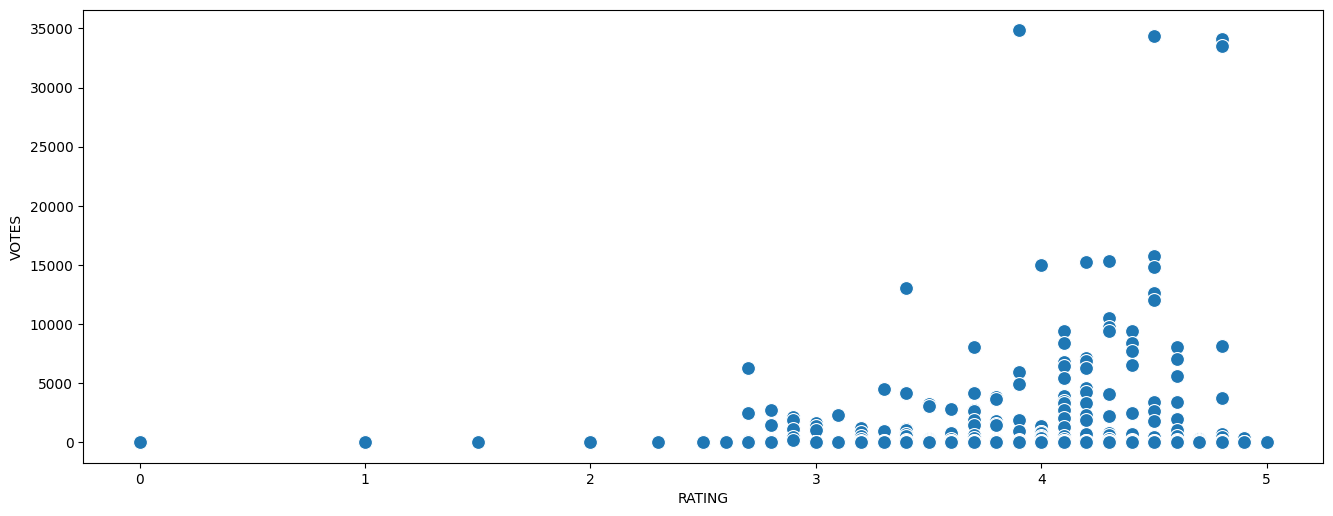

In [18]:
plt.figure(figsize=(16,6),dpi=100)
sns.scatterplot(x='RATING',y='VOTES',data=fandango,s=100)

In [19]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Creating a new column as YEAR**

In [158]:
def year_strip(movie):
    last_idx = movie.rfind(')')
    first_idx = movie.rfind('(')
    return movie[first_idx+1:last_idx]
    

In [159]:
year_strip('Film Title Name (Year)')

'Year'

In [160]:
fandango['YEAR'] = fandango['FILM'].apply(year_strip)

**Explore how many movies are in the Fandango DataFrame per year**

In [161]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Visualizing the count of movies per year with a plot:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

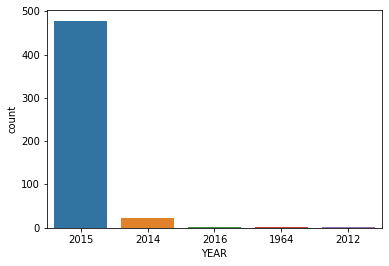

In [46]:
sns.countplot(x='YEAR',data=fandango)

**Exploring 10 movies with the highest number of votes**

In [47]:
fandango.sort_values('VOTES',ascending=False).iloc[0:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**How many movies have zero votes?**

In [51]:
len(fandango[fandango['VOTES'] == 0].index)

69

**Creating DataFrame of only reviewed films by removing any films that have zero votes.**

In [52]:
df = fandango[fandango['VOTES'] != 0]

In [53]:
df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**Creating a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clipped the KDEs to 0-5.**

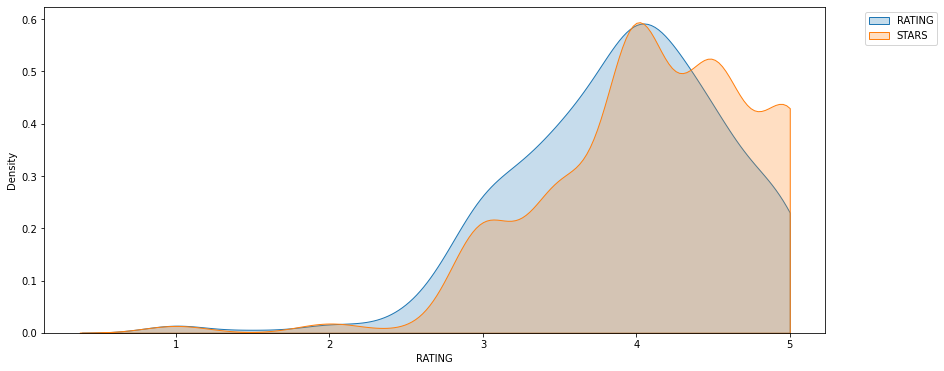

In [75]:
plt.figure(figsize=(14,6))
sns.kdeplot(x='RATING',data=df,shade=True,clip=(0.0, 5.0))
sns.kdeplot(x='STARS',data=df,shade=True,clip=(0.0, 5.0))
plt.legend(labels=["RATING","STARS"],bbox_to_anchor=(1.15, 1))

**Now actually quantify this discrepancy. Creating a new column of the different between STARS displayed versus true RATING.**

In [167]:
df['STARS_DIFF'] = round((df['STARS'] - df['RATING']),1) 

In [199]:
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Creating a count plot to display the number of times a certain difference occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

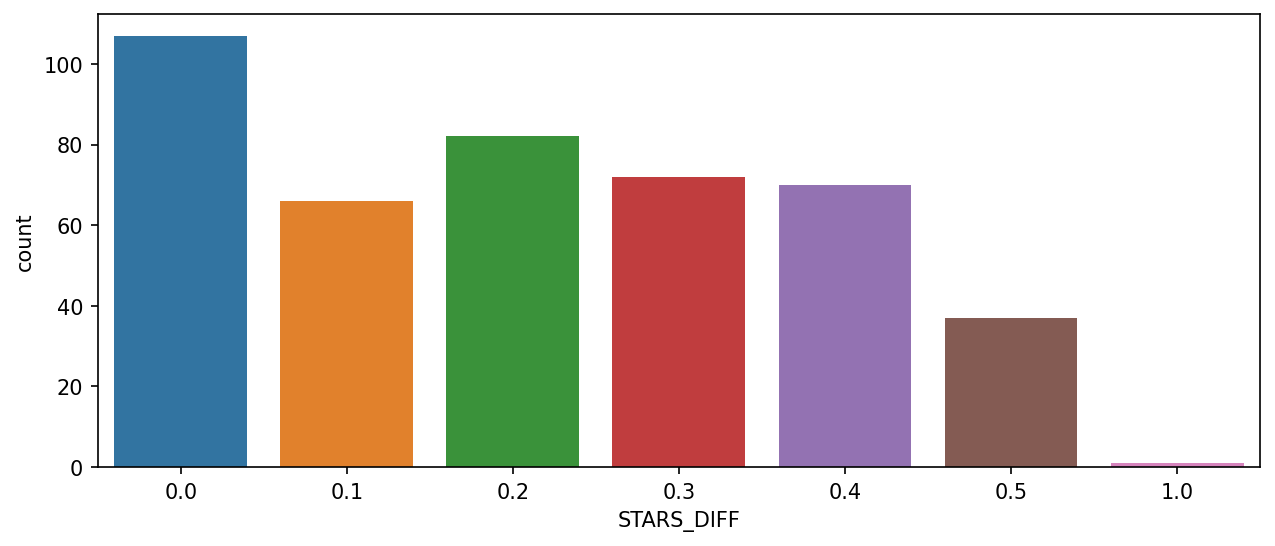

In [78]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='STARS_DIFF',data=df)

**Which movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [79]:
df[df['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Comparing the scores from Fandango to other movies sites

In [155]:
all_sites = pd.read_csv("C:\\Users\\yetki\Desktop\\Code\\Real Shit\\06-Capstone-Project\\all_sites_scores.csv")

**Explore the DataFrame columns, info, description.**

In [81]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [82]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 8.6+ KB


In [83]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

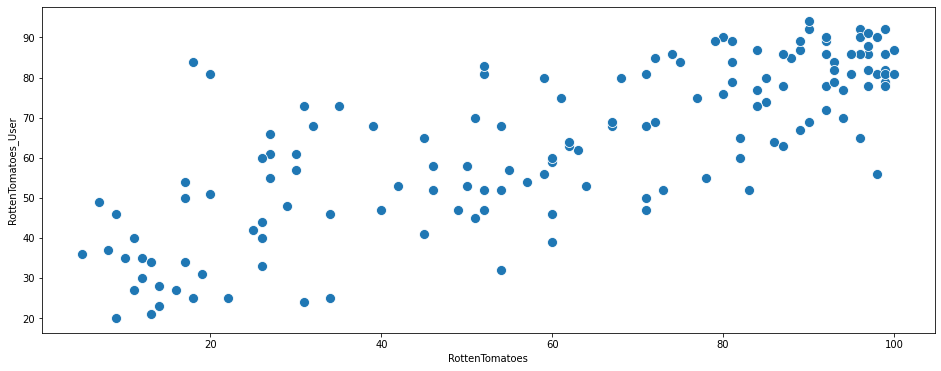

In [87]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites,s=100)

 
**Creating RT_diff columns which is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.**

In [179]:
all_sites['RT_diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [180]:
all_sites['RT_diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: RT_diff, Length: 146, dtype: int64

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**Calculating the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [130]:
all_sites.loc[all_sites.RT_diff < 0, 'RT_diff'] = -1* (all_sites.loc[all_sites.RT_diff < 0, 'RT_diff'])

In [131]:
all_sites['RT_diff']

0      12
1       5
2      10
3      66
4      14
       ..
141     9
142    15
143    19
144    19
145    24
Name: RT_diff, Length: 146, dtype: int64

In [107]:
all_sites['RT_diff'].mean()

15.095890410958905

**Ploting the distribution of the differences between RT Critics Score and RT User Score.**

<AxesSubplot:title={'center':'RT Critics - RT Users'}, xlabel='RT_diff', ylabel='Count'>

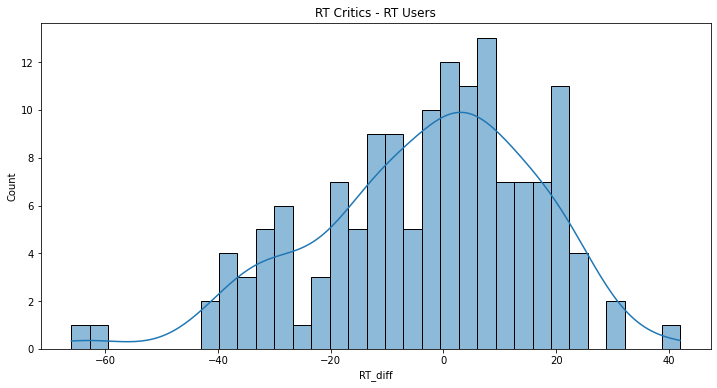

In [129]:
plt.figure(figsize=(12,6))
plt.title('RT Critics - RT Users')
sns.histplot(x='RT_diff',data=all_sites,kde=True,bins=33)

**Now creating a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

<AxesSubplot:title={'center':'RT Critics - RT Users'}, xlabel='RT_diff', ylabel='Count'>

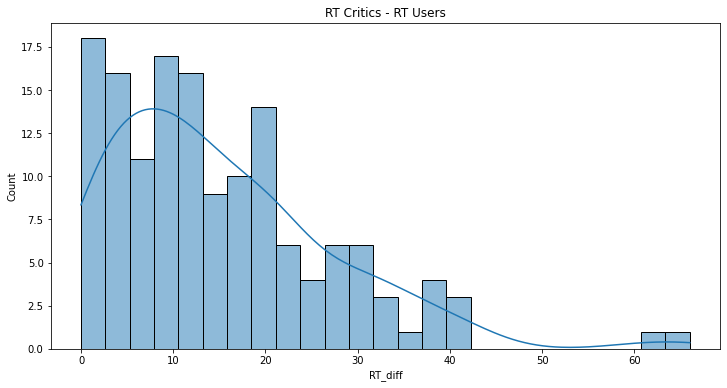

In [133]:
plt.figure(figsize=(12,6))
plt.title('RT Critics - RT Users')
sns.histplot(x='RT_diff',data=all_sites,kde=True,bins=25)

**Let's find out which movies are causing the largest differences. Large negative values imply the users rated the movie much higher on average than the critics did. Users Love but Critics Hate** 

In [137]:
all_sites.sort_values('RT_diff')[['FILM','RT_diff']].iloc[0:5]

,FILM,RT_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Now showing the top 5 movies critics scores higher than users on average. Critics love, but Users Hate**

In [138]:
all_sites.sort_values('RT_diff',ascending=False)[['FILM','RT_diff']].iloc[0:5]

,FILM,RT_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Displaying a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

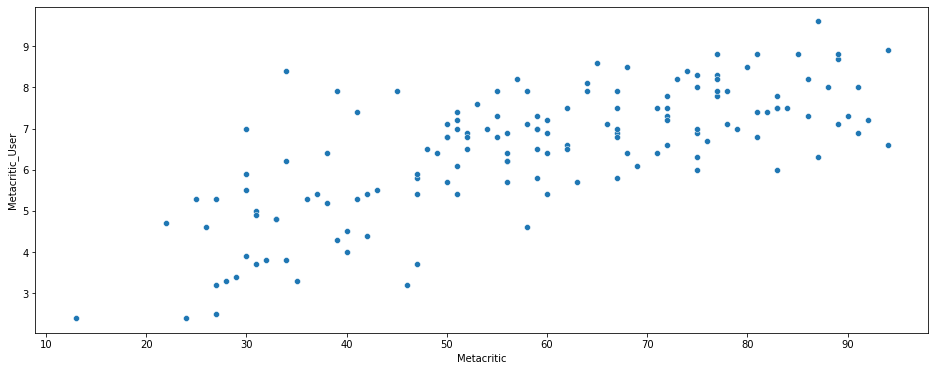

In [140]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Metacritic',y='Metacritic_User',data=all_sites)

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

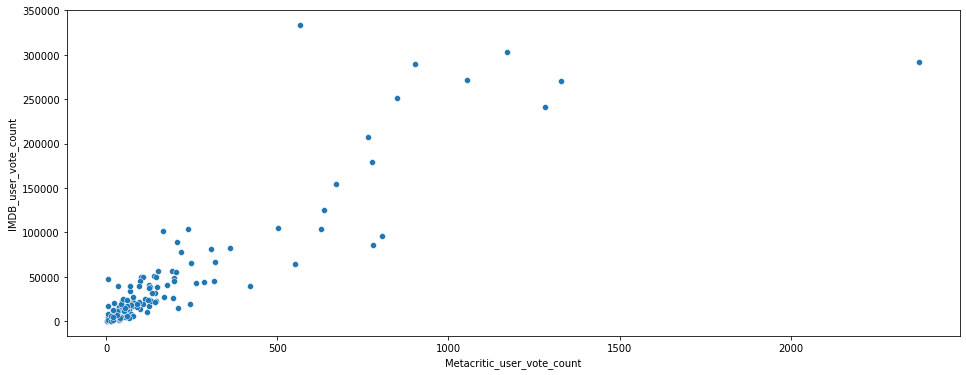

In [141]:
plt.figure(figsize=(16,6))
sns.scatterplot(y='IMDB_user_vote_count',x='Metacritic_user_vote_count',data=all_sites)


**What movie has the highest IMDB user vote count?**

In [144]:
all_sites.sort_values('IMDB_user_vote_count',ascending=False).iloc[0:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**What movie has the highest Metacritic User Vote count?**

In [146]:
all_sites.sort_values('Metacritic_user_vote_count',ascending=False).iloc[0:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames.**

In [181]:
df = pd.merge(fandango,all_sites,how='inner',on='FILM')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_diff                     145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [233]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango**



In [235]:
df['RT_Norm'] = round((df['RottenTomatoes'] / 20),1)
df['RTU_Norm'] = round((df['RottenTomatoes_User'] / 20),1)
df['Meta_Norm'] = round((df['Metacritic'] / 20),1) 

In [183]:
df['Meta_U_Norm'] = round((df['Metacritic_User'] / 2),1)
df['IMDB_Norm'] = round((df['IMDB'] / 2),1) 

In [186]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [189]:
df1 = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [190]:
df1.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**Create a plot comparing the distributions of normalized ratings across all sites.**

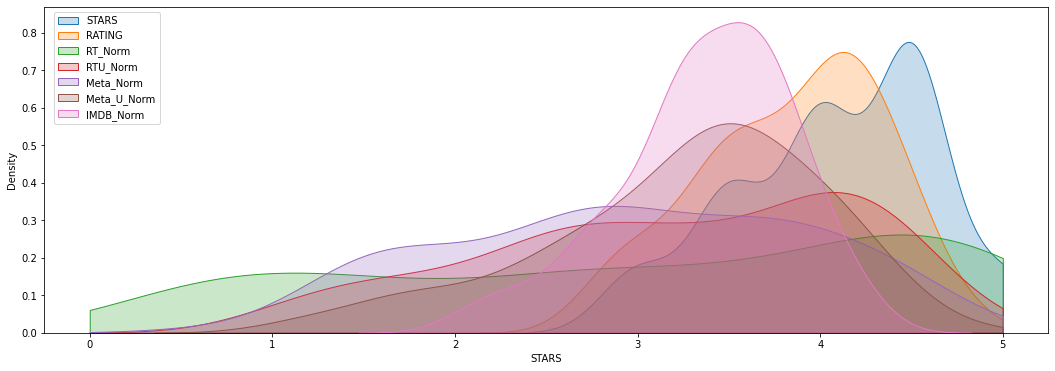

In [208]:
plt.figure(figsize=(18,6))
sns.kdeplot(x='STARS',data=df1,shade=True,clip=(0,5))
sns.kdeplot(x='RATING',data=df1,shade=True,clip=(0,5))
sns.kdeplot(x='RT_Norm',data=df1,shade=True,clip=(0,5))
sns.kdeplot(x='RTU_Norm',data=df1,shade=True,clip=(0,5))
sns.kdeplot(x='Meta_Norm',data=df1,shade=True,clip=(0,5))
sns.kdeplot(x='Meta_U_Norm',data=df1,shade=True,clip=(0,5))
sns.kdeplot(x='IMDB_Norm',data=df1,shade=True,clip=(0,5))
plt.legend(labels=['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm'],bbox_to_anchor=(0.12, 1))

**As we clearly see in blue and orange plots, Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

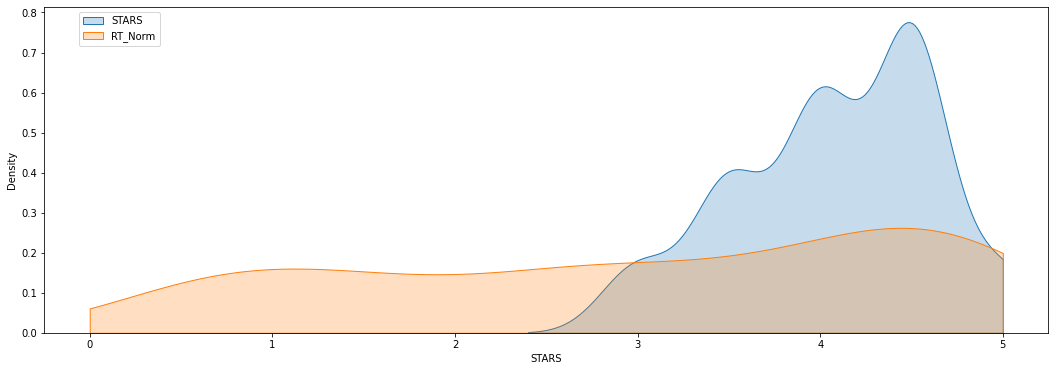

In [200]:
plt.figure(figsize=(18,6))
sns.kdeplot(x='STARS',data=df,shade=True,clip=(0,5))
sns.kdeplot(x='RT_Norm',data=df,shade=True,clip=(0,5))
plt.legend(labels=['STARS','RT_Norm'],bbox_to_anchor=(0.12, 1))

**Create a histplot comparing all normalized scores.**

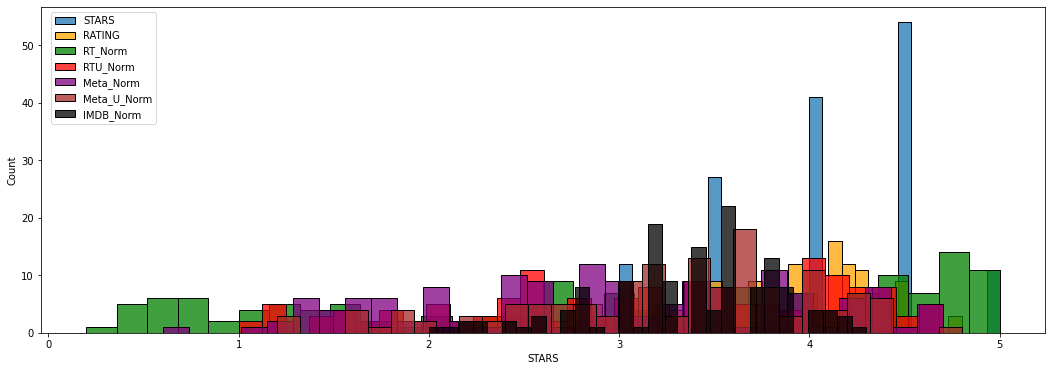

In [207]:
plt.figure(figsize=(18,6))
sns.histplot(x='STARS',data=df,bins=30)
sns.histplot(x='RATING',data=df,color='orange',bins=30)
sns.histplot(x='RT_Norm',data=df,color='green',bins=30)
sns.histplot(x='RTU_Norm',data=df,color='red',bins=30)
sns.histplot(x='Meta_Norm',data=df,color='purple',bins=30)
sns.histplot(x='Meta_U_Norm',data=df,color='brown',bins=30)
sns.histplot(x='IMDB_Norm',data=df,color='black',bins=30)
plt.legend(labels=['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm'],bbox_to_anchor=(0.12, 1))

**Above, not a best visualization**


### How are the worst movies rated across all platforms?

**Creating a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies**

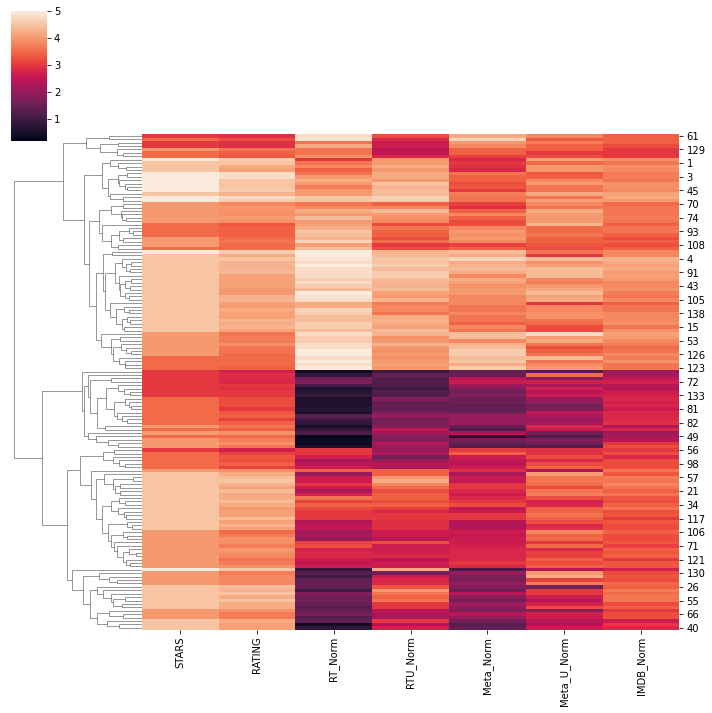

In [211]:
sns.clustermap(df1,col_cluster=False)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?**

In [212]:
df1['FILM'] = df['FILM']

C:\Users\yetki\AppData\Local\Temp\ipykernel_15624\518789927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FILM'] = df['FILM']


In [216]:
df2 = df1.sort_values('RT_Norm').iloc[0:10]
df2

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


**Visualize the distribution of ratings across all sites for the top 10 worst movies.**

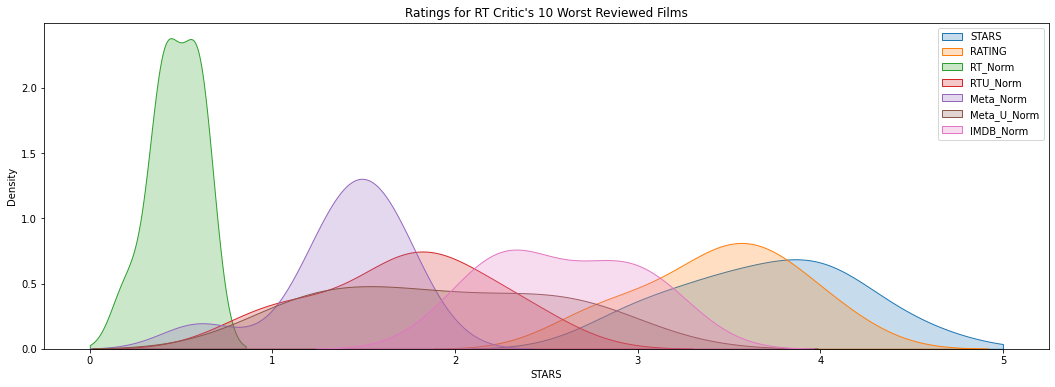

In [219]:
plt.figure(figsize=(18,6))
sns.kdeplot(x='STARS',data=df2,shade=True,clip=(0,5))
sns.kdeplot(x='RATING',data=df2,shade=True,clip=(0,5))
sns.kdeplot(x='RT_Norm',data=df2,shade=True,clip=(0,5))
sns.kdeplot(x='RTU_Norm',data=df2,shade=True,clip=(0,5))
sns.kdeplot(x='Meta_Norm',data=df2,shade=True,clip=(0,5))
sns.kdeplot(x='Meta_U_Norm',data=df2,shade=True,clip=(0,5))
sns.kdeplot(x='IMDB_Norm',data=df2,shade=True,clip=(0,5))
plt.legend(labels=['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm'])
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

----